# Problem Set 06: 

0. [Credit for Contributors (required)](#contributors)

1. [Activity Planning](#problem1)
    1. [Defining Predicates (5 points)](#predicates)
    2. [Problem Formulation (5 points)](#problem_form)
    3. [Relaxed Plan Graph and FF Heuristic (20 points)](#relaxed)
      
2. [RRT Path Planning](#problem2)
    1. [Complete the code for `grid_to_graph` (15 points)](#grid_to_graph)
    2. [Complete the code for `eucl_dist_cell` below. (5 points)](#eucl_dist_cell)
    3. [Test A\* in a grid (5 points)](#astar_grid_test)
    4. [Find instances in which greedy search produces worse paths than A\* (5 points)](#greedy_worse_paths)
    5. [Explain why the path returned by Greedy search is worse (5 points)](#greedy_explanation)

    
**100 points** total for Problem Set 4



## <a name="contributors"></a> Credit for Contributors

List the various students, lecture notes, or online resouces that helped you complete this problem set:

Ex: I worked with Bob on the cat activity planning problem.

<div class="alert alert-info">
Write your answer in the cell below this one.
</div>

I worked with Tom Stuart, Skye Eiskowitz and the Twins on this assignment in its entirety

## <a name="problem1"></a> Problem 1: Activity Planning (30%)

In this problem, we will model planning an observation for a spacecraft in orbit around Mars. Many older spacecraft were not designed with concurrency in mind, and so they required attitude (orientation) changes to point different instruments towards the Martian surface, the Earth, or the Sun. 



<img src=maven.png style="width: 60%;">


In our model, the orbiter has a sensor, a communications radar, solar cells for charging a battery, and a data cache. 

At any point in time, the orbiter may be:

- pointed at Mars (sensor pointed to surface for observations)
- pointed at Earth (radar pointed to Earth for transmission)
- pointed at the Sun (solar panels to Sun for charging)

These options are assumed to be mutually exclusive. We model attitude changes as requiring no power.

If the orbiter is pointed at the Sun, it may charge its battery to full. If the orbiter is pointed at Mars and has a full battery, it may make an observation. The observation empties the orbiter’s battery, but it gains data as a result. If the orbiter is pointed at Earth, has a full battery, and data in its cache, it may transmit data. Transmission of the data home empties the orbiter’s battery and the data cache. The objective of the mission is for the data to be sent back to Earth.

We will model the orbiter’s available actions as the following:
- Point at Earth
- Point at Mars
- Point at Sun
- Charge
- Observe
- Transmit 

### <a name="predicates"></a>Defining Predicates

Define the predicates for the problem, and define the preconditions and effects for each of the actions above. An example is given below. You may use the predicates in the example, but you are not obligated to.

**Observe:**

&nbsp;&nbsp;&nbsp;*Preconditions:* pointed-at-mars, battery-full

&nbsp;&nbsp;&nbsp;*Effects:* data-onboard, not battery-full 


Predicates represent statements that are always true or false, so something like (pointed == Mars), which is more like a variable that could have the values {Mars, Earth, Sun}, is invalid. 


1. Define your predicates to model the problem.

2. Write the preconditions and effects for each of the 6 actions.

3. Do your actions (preconditions and effects) prevent you from pointing at two places at the same time? You may assume the start state is only pointed at a single location.

4. The mission ends when the data has been transmitted. Can your predicates be used to indicate that the goal has been achieved?

You may upload handwritten work for any of the following answers, with the same instructions from Problem Set 3. You can use the html tag provided in the cell below by changing the name of the image file.


<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

Predicates: pointed-at-mars, pointed-at-earth, pointed-at-sun, battery-full, data-transmitted, data-onboard

Preconditions and effects:

Point at Earth: pre-conditions: not pointed-at-earth; effects: pointed-at-earth
Point at Mars: pre-conditions: not pointed-at-mars; effects: pointed-at-mars
Point at Sun: pre-conditions: not pointed-at-sun; effects: pointed-at-sun
Charge: pre-conditions: pointed-at-sun; effects: battery-full
Observe: pre-conditions: pointed-at-mars, battery full; effects: data-onboard, not battery-full
Transmit: pre-conditions: data-onboard, pointed-at-earth, battery-full; effects: not data-onboard, not battery-full, data-transmitted

Question 3: yes – my actions with pre-conditions and effects prevent me from being pointed at two places at once. Each pointing state in this predicate model is defined using propositional logic, so each condition/pre-condition can be true or false, while each pointing state is mutually exclusive. 

Question 4: Yes, my predicates can be used to determine whether or not the goal has been achieved. The final state of the vehicle including “data-transmitted” is a goal state, and it can be searched and checked for using an algorithm or propositional logic. 

### <a name="problem_form"></a>Problem Formulation

Assume the orbiter starts pointed at Mars, with batteries empty and with no sensor data onboard. Write this initial state and the final state in terms of your predicates. Recall that an omitted predicate in the initial state implies that the predicate is false.


1. Write the intial and goal states (in terms of your predicates that are True).

2. Write a sequence of actions from start to goal. 

3. What does this sequence tell you about the search tree depth that would need to be searched by Breadth First Search?



<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

Problem Formulation:

Initial States: pointed-at-mars (and not battery-full and not data-onboard and not data-transmitted, but these are false so do not need to be included)

Goal State: data-transmitted

Action Sequence: 
1)	Point at sun and charge
2)	Point at mars and observe
3)	Point at sun and charge
4)	Point at earth and transmit 

This sequence tells me that the BFS tree depth will need to find 8 actions even though this occurs in four action “layers”. This will determine how the tree will be formed and how the algorithm needs to be searched to find the sequence of actions from the preconditions through the goal state. 


### <a name="relaxed"></a>Relaxed Plan Graph and FF Heuristic

Now build a relaxed plan graph for the scenario to calculate the Fast-Forward heursitic value of the initial state.
You should organize the relaxed plan graph into columns of 'Facts n' (states/predicates that are True at time n) and 'Actions n' (actions that can be taken as time n given Facts n), as shown below. There is an example worked out in Lecture 05 slides. 


<img src="relaxed_graph.png"/>


1. Create the relaxed plan graph that starts with the initial state and achieves all of the goal predicates.

2. What is the associated FF heuristic for the intial state?

3. How does the heuristic compare to the length of the true plan you found in the second part? If they are different, why?



<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

Relaxed Plan Graph and FF Heuristic - see the jpeg below:

2- the associated graph with FF heuristic for this particular initial state has 5 actions before achieving the goal state. That means the FF heuristic for the initial state is 5. 

3- The length of these actions is different because the heuristic can enable pointing in two places at once technically and the effects of one predicate can be temporarily ignored because we don’t delete facts according to the lecture slides from lecture 10. Because of how the algo works, I don’t need to recharge after observing, which allows me to skip an action layer (point to the sun and re-charge).


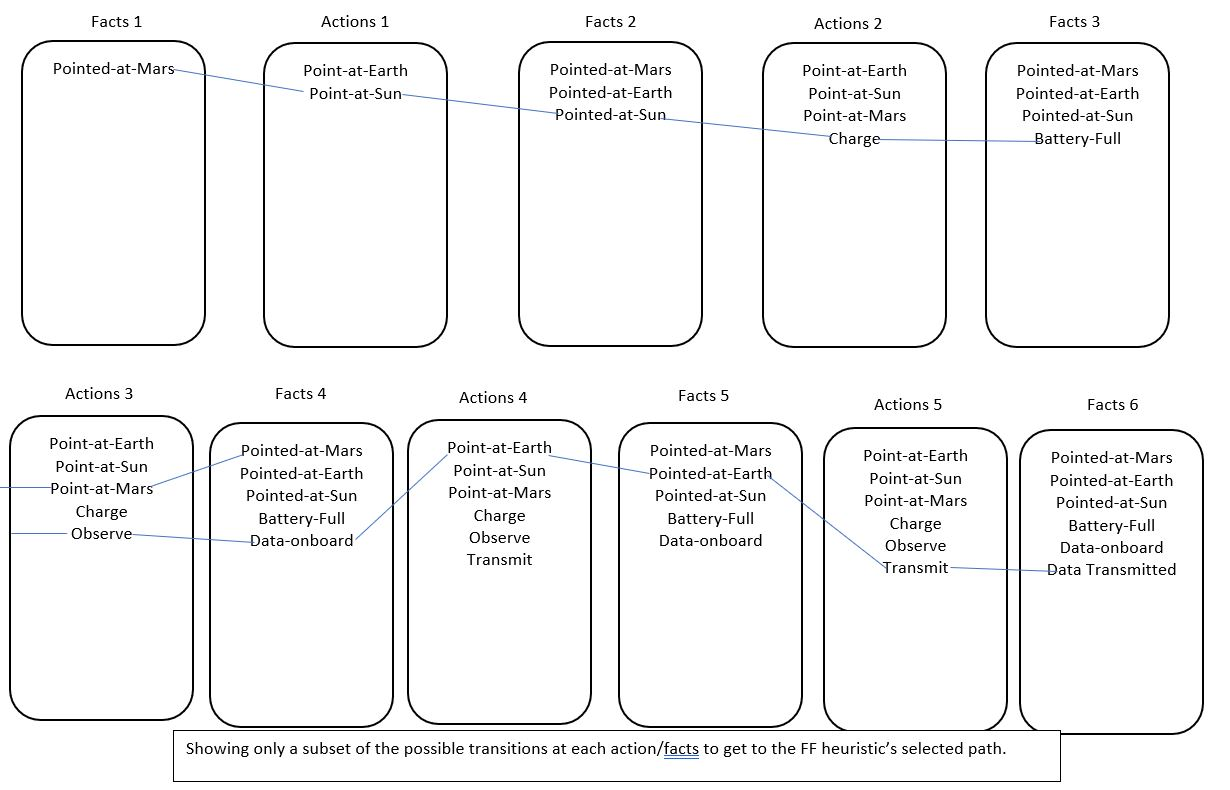

In [4]:
from IPython.core.display import Image, display
display(Image(filename='FF.JPG'))



## <a name="problem2"></a> Problem 2 : RRT Path Planning (70%)

In this problem you will implement the Rapidly-Exploring Random Tree (RRT) algorithm to help a robot navigate from its starting position to the desired end region in an environment full of obstacles.

<img src='rrt_examples.png'/>

You will implement the function `rrt` with the following signature:

```python
def rrt(bounds, environment, start_pose, radius, end_region)
```

where:

- `bounds=(minx, miny, maxx, maxy)` is a tuple that indicates the bounds of the environment (the region the robot can traverse). Example `bounds=(-5, -4, 15, 5)`.
- `environment` is an instance of the `Environment` class that describes the placement of the obstacles in the scene (see more examples below).
- `start_pose = (x,y)` is a tuple indicating the starting position of the robot. Example: `start_pose=(-4, -2)`.
- `radius` is the radius of the robot (used for collision checking). Example `radius=0.1`.
- `end_region` is a `shapely` `Polygon` that describes the region that the robot needs to reach. See examples below.

Your function should:

- return a list of tuples `(x,y)` describing the obstacle free path that takes the robot to the target region. Example of a valid returned path: `[(-4, -2), (-3.71, -1.97), (-3.41, -1.8865), (-3.50, -2.69)]`. Note that your rrt function should produce paths such that the straight line connecting any pair of consecutive points should be obstacle free (considering the obstacles and the size of the robot). In the given example, it should be possible to go from `(-4, -2)` to `(-3.71, -1.97)` in a straight line without colliding with anything.
- produce a plot showing the tree and the obstacle free path (such as the ones shown above)
- show the number of nodes in the tree, the number of nodes in the solution path and the path length (you could put this in the plot title, as in the examples above)


**You are required to submit this notebook with:**

1. The code function `rrt` as described above
2. The results (plots) of using your `rrt` function in the easy and bugtrap environments provided (see code stubs below).
3. The results of using your `rrt` function in a moderate (40 obstacles) and hard (+300 obstacles) environments that you will generate yourself. You will probably want to generate these environments automatically.

See the provided example notebook [RRT Helpful Examples](ProblemSet04_RRT_examples.ipynb) for examples on how to use the `Environment` class, the `shapely` library, and how to do some simple collision checking.


<div class="alert alert-info">
**NOTE:** You don't need to write all your code in this notebook if you don't want to. You could create your own `.py` files and then import them into this notebook. We do require that we are able to run the two environments that we provide and the two that you generate in this notebook and that the plots are embedded here.
</div>


<div class="alert alert-warning">
Please ensure that you submit your notebook with the cells already executed. That is, you should save the notebook when your code has been executed and the plots are visible. That way, we will be able to look at your solution initially without running your code first.
</div>



In [5]:
# Useful imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import numpy as np
import yaml
from shapely.geometry import Point, Polygon, LineString, box
from environment import Environment, plot_environment, plot_line, plot_poly
from check_path import check_path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Write your RRT code here (this cell and below)!
# Note that you can write your code in separate .py files
# and import them here later if you prefer
import random
import math
import numpy as np
import pdb


def next_point(x_nearest, x_random, distance_max):
    #pdb.set_trace()
    distance = math.sqrt(((x_nearest[0] - x_random[0]) ** 2) + ((x_nearest[1] - x_random[1]) ** 2))
    if distance <= distance_max: #If it is within the bound
        return x_random
    else: #make unit vectors and multiply by the maximum distance
        x = x_nearest[0]+distance_max*(x_random[0]-x_nearest[0])/distance
        y = x_nearest[1]+distance_max*(x_random[1]-x_nearest[1])/distance
        return (x,y)

def randPosition(bounds):
    random_x = bounds[0]+random.uniform(0,1)*(bounds[2]-bounds[0])
    random_y = bounds[1]+random.uniform(0,1)*(bounds[3]-bounds[1])

    return (random_x,random_y)

def isObstructed(x_nearest, x_new, environment, radius):
    line = LineString([x_nearest, x_new])
    expanded_line = line.buffer(radius, resolution=3)
    for i, obs in enumerate(environment.obstacles):
        if expanded_line.intersects(obs):
            return True
    return False

def find_closest(x_new, path):
    minimum_dist = np.inf
    for point in path:
        distance = math.sqrt( ((x_new[0]-point[0])**2)+((x_new[1]-point[1])**2) )
        if distance < minimum_dist:
            minimum_dist = distance
            closest = point
    return closest

def find_path_length(final_path):
    distance=0
    for j in range(len(final_path)-1): #iterate for each node in the final path
        additive_distance= math.sqrt(((final_path[j][0] - final_path[j+1][0]) ** 2) + ((final_path[j][1] - final_path[j+1][1]) ** 2))
        distance+=additive_distance #add the new distance from the next edge on the path
    return distance

def backtrack(x_new, path_dict, start_pose):
    final_path = [x_new]
    parent = x_new
    while parent != start_pose:
        if parent in path_dict.keys():
            parent_new = path_dict[parent]
            final_path.append(parent_new) #add the new parent path dictionary to the final path
            parent = parent_new
    final_path.reverse() #swithc the final path around
    return final_path

def plot(start, radius, path_dict, final_path):
    start_pose = Point(start).buffer(radius, resolution=3)
    
    ax = plot_environment(environment, bounds=bounds) #stolen code from the example
    
    plot_poly(ax, start_pose, 'red') #make the start red
    plot_poly(ax, goal_region, 'green', alpha=0.75) #make the goal green, duh
    
    
    for key in path_dict:
        if key != start:
            x=key
            y=path_dict[key]
            line = LineString([x, y])
            plot_line(ax, line) #plot a line in the environment given the path dictionary and its key
    for i in range(len(final_path) - 1):
        line = LineString([final_path[i], final_path[i + 1]])
        next_line = line.buffer(radius, resolution=3)
        plot_poly(ax, next_line, 'magenta', alpha=0.4) #this will draw the next line which is an expanded line
    
    #this will give the plot of the environment a title:
    ax.set_title('{tree_nodes} tree nodes, Path Length: {path_length} ( {nodes} nodes)'.format(tree_nodes=len(path_dict),path_length=round(find_path_length(final_path),2),nodes=len(final_path)))
    plt.show()


def rrt(bounds, environment, start, radius, goal_region):
    num_iterations = 10000
    distance_max = 1
    path_dict={}
    path_dict[start]=[]
    path=[start]
    for _ in range(num_iterations): #iterate n times, given what I set this to in line 85
        x_random = randPosition(bounds)
        x_nearest = find_closest(x_random, path)
        x_new = next_point(x_nearest,x_random, distance_max)
    
        if isObstructed(x_nearest, x_new, environment, radius)==False:
            path.append(x_new)
            path_dict[x_new] = x_nearest

        if goal_region.contains(Point((x_new[0], x_new[1])))==True:
            final_path= backtrack(x_new, path_dict, start)
            plot(start, radius, path_dict, final_path)
            return final_path

    return print('You did not return a path')



(7.0, 5.5)


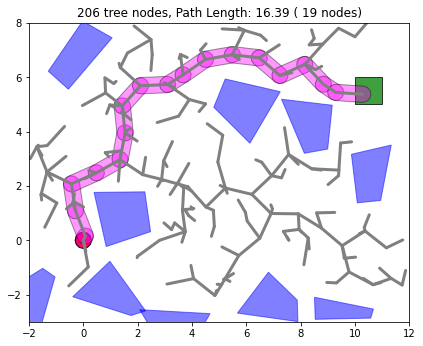

Path seems to be correct. 
 However, collisions are not checked. Make sure your path doesn't collide with any obstacles.

In [7]:
# Test your code in the simple environment
# don't modify this cell. It will be overwritten by the autograder.
# if you want to test things, please create additional cells at the end
environment = Environment('simple.yaml')
radius = 0.3
bounds = (-2, -3, 12, 8)
start = (0, 0)
goal_region = Polygon([(10,5), (10,6), (11,6), (11,5)])
path = rrt(bounds, environment, start, radius, goal_region)
# The check path function checks that the path is a list,
# its elements are tuples and the start and end are correct
# It doesn't check collisions.
check_path(path, bounds, environment, start, radius, goal_region)

(7.0, 5.5)


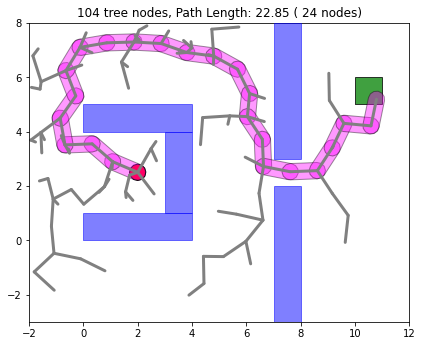

Path seems to be correct. 
 However, collisions are not checked. Make sure your path doesn't collide with any obstacles.

In [8]:
# Test your code in the bugrap environment
# don't modify this cell. It will be overwritten by the autograder.
# if you want to test things, please create additional cells at the end
environment = Environment('bugtrap.yaml')
radius = 0.3
bounds = (-2, -3, 12, 8)
start = (2, 2.5)
goal_region = Polygon([(10,5), (10,6), (11,6), (11,5)])
path = rrt(bounds, environment, start, radius, goal_region)
# The check path function checks that the path is a list,
# its elements are tuples and the start and end are correct
# It doesn't check collisions.
check_path(path, bounds, environment, start, radius, goal_region)

In [9]:
# Write the code to test your moderate and hard enviroments
# here and below

(-5, -4, 15, 5)
(11.811261300538654, 5.5)
(-5, -4, 15, 5)
(12.001673442436486, 5.5)
(-5, -4, 15, 5)
(11.811261300538654, 5.5)


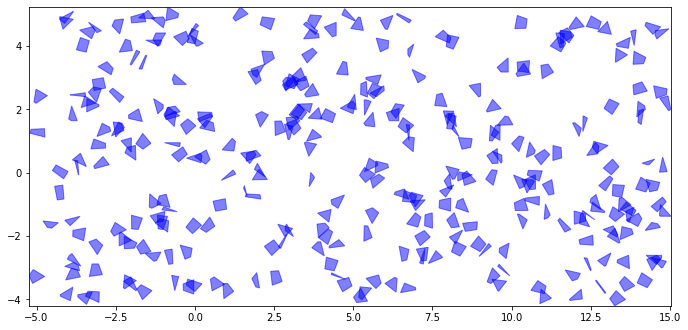

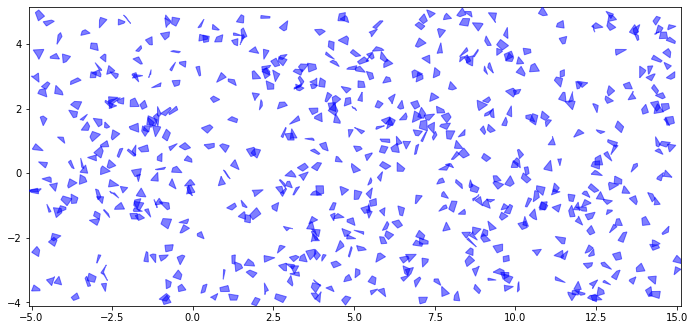

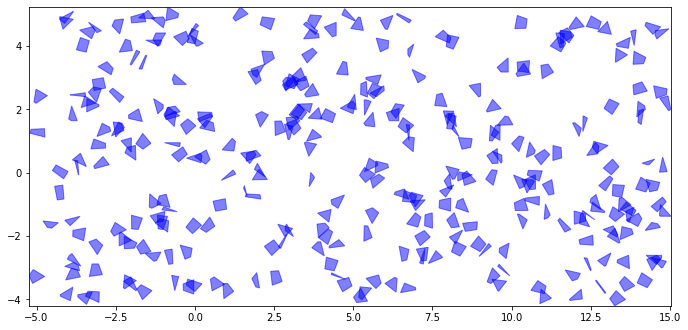

In [10]:
def random_environment(bounds, start, radius, goal, n, size_limits=(0.5, 1.5)):
    minx, miny, maxx, maxy = bounds
    print(bounds)
    edges = 4
    minl, maxl = size_limits
    env = Environment(None)
    obs = []
    start_pose = Point(start).buffer(radius, resolution=3)
    obi = 0
    while obi < n:
        r = np.random.uniform(low=0.0, high=1.0, size=2)
        xy = np.array([minx + (maxx-minx)*r[0], miny + (maxy-miny)*r[1]])
        
        angles = np.random.rand(edges)
        angles = angles*2*np.pi / np.sum(angles)
        for i in range(1,len(angles)):
            angles[i] = angles[i-1] + angles[i]
        angles = 2*np.pi * angles / angles[-1] 
        angles = angles + 2*np.pi*np.random.rand()
        lengths = 0.5*minl + (maxl-minl) * 0.5 * np.random.rand(edges)
        xx = xy[0] + np.array([l*np.cos(a) for a,l in zip(angles,lengths)])
        yy = xy[1] + np.array([l*np.sin(a) for a,l in zip(angles,lengths)])
        p = Polygon([(x,y) for x,y in zip(xx,yy)])
        if p.intersects(start_pose) or p.intersects(goal):
            continue
        else:
            obi = obi + 1
            obs.append(p)
#         coords = xy + [l*np.cos(a),l*np.sin(a) for a,l in zip(angles,lengths)]
    env.add_obstacles(obs)
    return env


start = (-4,-2)
radius = 0.1
goal_region = Polygon([(12,3), (12,4), (13,4),(13,3)])
bounds = (-5, -4, 15, 5)



env_moderate = random_environment(bounds, start, radius, goal_region, 300, (0.5, 0.5))
plot_environment(env_moderate)
env_moderate.save_to_yaml('moderate300.yaml')

env_challenging = random_environment(bounds, start, radius, goal_region, 600, (0.2, 0.4))
plot_environment(env_challenging)
env_challenging.save_to_yaml('challenging600.yaml')

env_moderate40 = random_environment(bounds, start, radius, goal_region, 40, (0.5, 0.5))
plot_environment(env_moderate)
env_moderate40.save_to_yaml('mod40.yaml')

(12.222222222222221, 5.5)


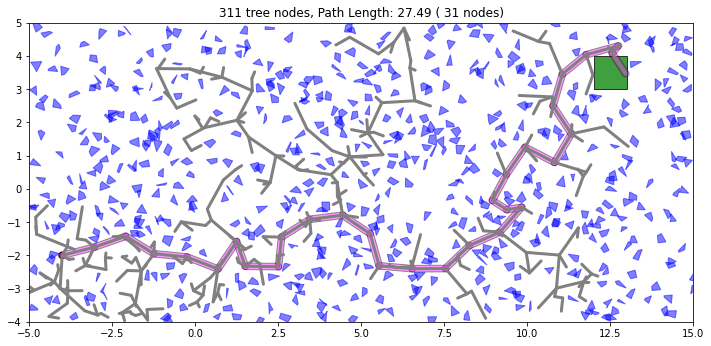

Path seems to be correct. 
 However, collisions are not checked. Make sure your path doesn't collide with any obstacles.

(12.222222222222221, 5.5)


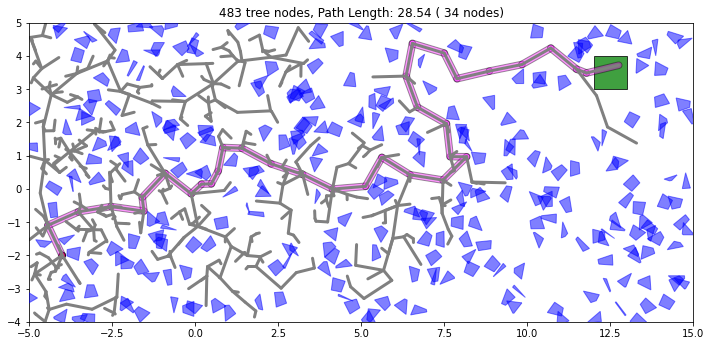

Path seems to be correct. 
 However, collisions are not checked. Make sure your path doesn't collide with any obstacles.

(12.222222222222221, 5.5)


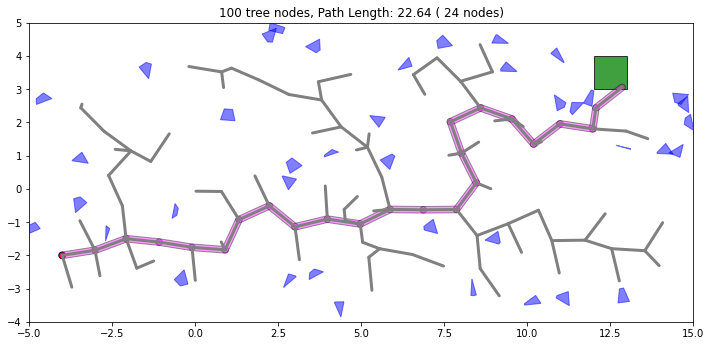

Path seems to be correct. 
 However, collisions are not checked. Make sure your path doesn't collide with any obstacles.

In [19]:
# Test your code in the challenging environment that you made
environment = Environment('challenging600.yaml')
# radius = 0.2
# bounds = (-2, -3, 12, 8)
# start = (2, 2.5)
# goal_region = Polygon([(10,5), (10,6), (11,6), (11,5)])


path = rrt(bounds, environment, start, radius, goal_region)
# The check path function checks that the path is a list,
# its elements are tuples and the start and end are correct
# It doesn't check collisions.
check_path(path, bounds, environment, start, radius, goal_region)

environment = Environment('moderate300.yaml')
path = rrt(bounds, environment, start, radius, goal_region)
check_path(path, bounds, environment, start, radius, goal_region)


environment = Environment('mod40.yaml')
path = rrt(bounds, environment, start, radius, goal_region)
check_path(path, bounds, environment, start, radius, goal_region)